In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import networkx as nx
from networkx.algorithms.approximation import average_clustering
import community.community_louvain as cl

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['font.size'] = 22
import seaborn as sns

from sklearn.metrics import adjusted_rand_score

# Funciones de utiles.py
# from utiles import read_graph , read_graph_weighted, get_graph_pos , drop_weights , plotGraph , plotWeightedGraph
from utiles import *

In [2]:
email = read_graph('datasets/email.txt')
terr= read_graph_weighted('datasets/terrorist.txt')
TerroristUnweighted = terr.copy()
drop_weights(TerroristUnweighted)

In [3]:
Gemail=email.copy()
Gemail.remove_edges_from(nx.selfloop_edges(Gemail)) # Borro autoenlaces
Gemailcc = sorted(nx.connected_components(Gemail), key=len, reverse=True)
emailGiant = Gemail.subgraph(Gemailcc[0])

In [4]:
pos_terr = nx.spring_layout(terr,iterations=1000)
pos_email = nx.spring_layout(email,iterations=1000)
pos_emailGiant = nx.spring_layout(emailGiant,iterations=1000)

In [59]:
pos_emailGiant = nx.spring_layout(emailGiant,iterations=1000,k=10)

# CENTRALIDAD Intermediacion vs CENTRALIDAD de Grado

In [5]:
email_centr_betweenness = nx.betweenness_centrality(emailGiant)
email_centr_grado = nx.degree_centrality(emailGiant)

terr_centr_betweenness = nx.betweenness_centrality(terr)
terr_centr_grado = nx.degree_centrality(terr) 

In [8]:
len(emailGiant.edges())

16064

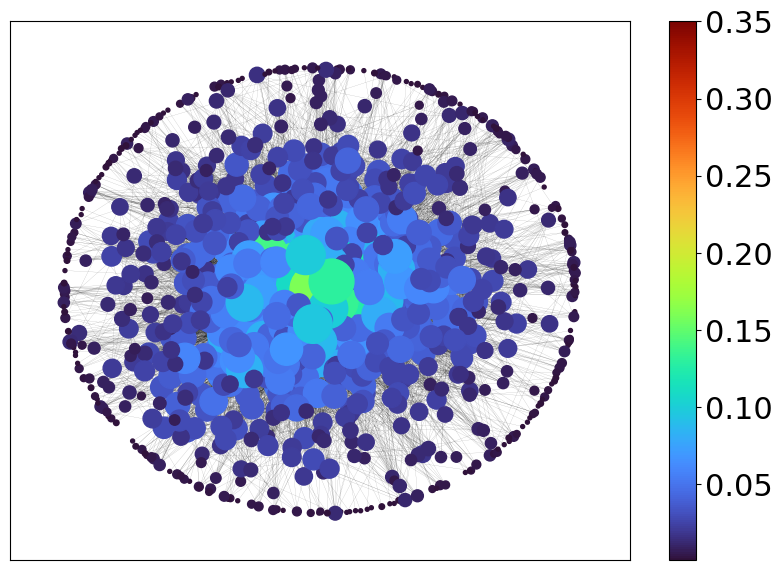

In [69]:
plt.figure(figsize=(10,7))
values = [v for n,v in email_centr_grado.items()]
sizes = [ 8000*email_centr_grado[node] for node in emailGiant.nodes()]
h=nx.draw_networkx_nodes(emailGiant, pos_emailGiant, node_size=sizes, node_color = values,cmap=plt.cm.turbo)
# nx.draw_networkx_labels(G_obs, layout,font_weight='bold', font_color='black')
# edge_weights_obs = nx.get_edge_attributes(G_obs, "weight")
# edgeWidth_obs=np.array(list(edge_weights_obs.values()))
# edgeWidth_obs=edgeWidth_obs/np.max(edgeWidth_obs)
edgeWidth = np.zeros(len(emailGiant.edges()))+0.1

nx.draw_networkx_edges(emailGiant, pos_emailGiant, edgelist=emailGiant.edges(),width=edgeWidth,edge_color='black',alpha=0.5)
plt.colorbar(h)

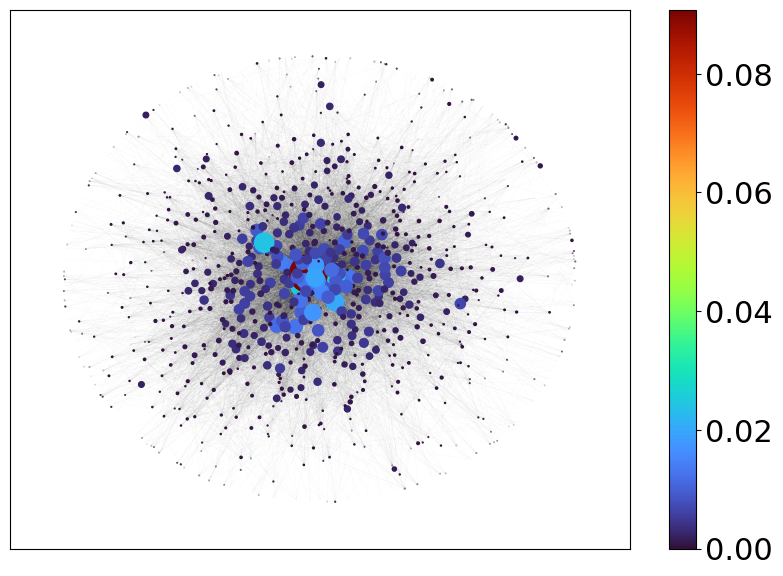

In [70]:
plt.figure(figsize=(10,7))
values = [v for n,v in email_centr_betweenness.items()]
sizes = [8000 * email_centr_betweenness[node] for node in emailGiant.nodes()]
h=nx.draw_networkx_nodes(emailGiant, pos_emailGiant, node_size=sizes, node_color = values,cmap=plt.cm.turbo)
# nx.draw_networkx_labels(G_obs, layout,font_weight='bold', font_color='black')
# edge_weights_obs = nx.get_edge_attributes(G_obs, "weight")
# edgeWidth_obs=np.array(list(edge_weights_obs.values()))
# edgeWidth_obs=edgeWidth_obs/np.max(edgeWidth_obs)
edgeWidth = np.zeros(len(emailGiant.edges()))+0.01

nx.draw_networkx_edges(emailGiant, pos_emailGiant, edgelist=emailGiant.edges(),width=edgeWidth,edge_color='black',alpha=0.8)
plt.colorbar(h)

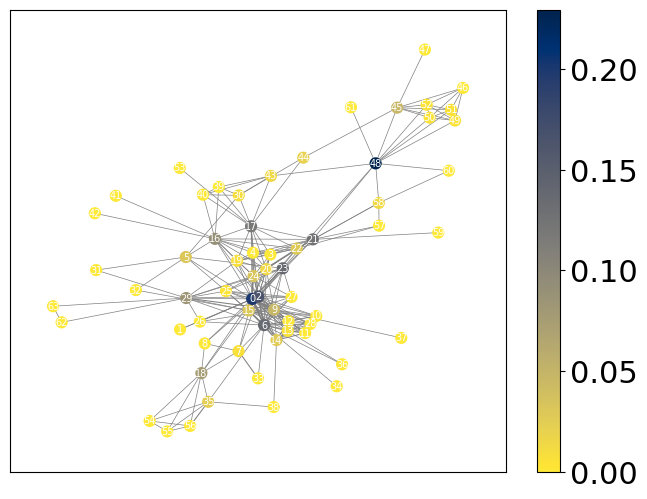

In [55]:
values = [v for n,v in terr_centr_betweenness.items()]
h=nx.draw_networkx_nodes(terr,pos=pos_terr,node_size=60, node_color = values, cmap=plt.cm.cividis_r)
nx.draw_networkx_labels(terr,pos_terr,{n:n for n in terr.nodes()},font_size=7,font_color='white' )



edge_weights = nx.get_edge_attributes(terr, "weight")
edgeWidths=np.array(list(edge_weights.values()))
edgeWidths=1*edgeWidths/np.max(edgeWidths)
edgeWidths[edgeWidths>0]=edgeWidths[edgeWidths>0]-np.min(edgeWidths[edgeWidths>0])+.5

nx.draw_networkx_edges(terr, pos_terr, edgelist=terr.edges(),width=edgeWidths,edge_color='gray')
plt.colorbar(h)

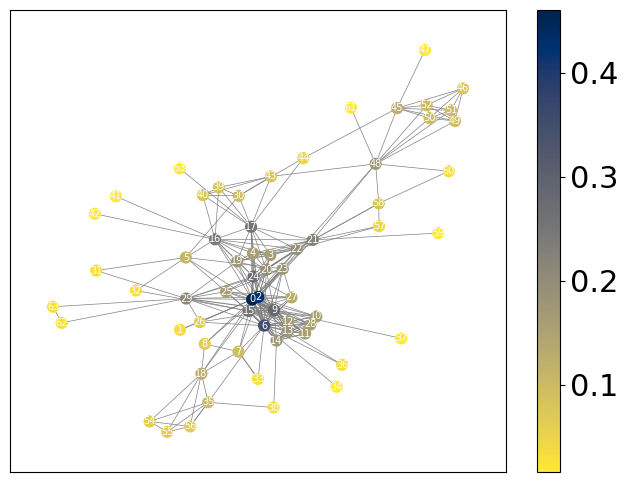

In [57]:
values = [v for n,v in terr_centr_grado.items()]
h=nx.draw_networkx_nodes(terr,pos=pos_terr,node_size=60, node_color = values, cmap=plt.cm.cividis_r)
nx.draw_networkx_labels(terr,pos_terr,{n:n for n in terr.nodes()},font_size=7,font_color='white' )



edge_weights = nx.get_edge_attributes(terr, "weight")
edgeWidths=np.array(list(edge_weights.values()))
edgeWidths=1*edgeWidths/np.max(edgeWidths)
edgeWidths[edgeWidths>0]=edgeWidths[edgeWidths>0]-np.min(edgeWidths[edgeWidths>0])+.5

nx.draw_networkx_edges(terr, pos_terr, edgelist=terr.edges(),width=edgeWidths,edge_color='gray')
plt.colorbar(h)

In [6]:
dict(sorted(terr_centr_betweenness.items() , key= lambda item : item[1],reverse=True))

{np.int64(48): 0.2296569891295954,
 np.int64(0): 0.20089716941995484,
 np.int64(2): 0.16427966506051503,
 np.int64(23): 0.13772902712994878,
 np.int64(6): 0.13705370000812914,
 np.int64(21): 0.12616081681621877,
 np.int64(17): 0.11891971720440744,
 np.int64(16): 0.09002491080064044,
 np.int64(29): 0.08407838108298937,
 np.int64(18): 0.0754137681173011,
 np.int64(9): 0.046934609146590714,
 np.int64(45): 0.04687338245965997,
 np.int64(24): 0.03246839779097843,
 np.int64(5): 0.03137224043522047,
 np.int64(15): 0.030028554798140056,
 np.int64(22): 0.027005120668715132,
 np.int64(14): 0.02638065979079804,
 np.int64(35): 0.02380505368216581,
 np.int64(44): 0.020199023322423227,
 np.int64(43): 0.014277586781427024,
 np.int64(20): 0.013148488878135575,
 np.int64(58): 0.012924486618803055,
 np.int64(30): 0.00881147071623262,
 np.int64(19): 0.007268427084095287,
 np.int64(13): 0.006739607891681621,
 np.int64(7): 0.006466523747629735,
 np.int64(49): 0.005076329244275992,
 np.int64(50): 0.00507632

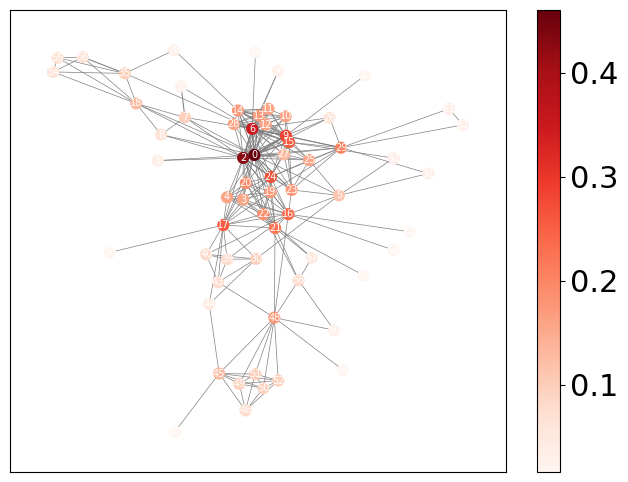

In [8]:
plotWeightedGraph(terr , pos_terr , terr_centr_grado, 1 , 60)


In [9]:
dict(sorted(terr_centr_grado.items() , key= lambda item : item[1],reverse=True))

{np.int64(0): 0.4603174603174603,
 np.int64(2): 0.42857142857142855,
 np.int64(6): 0.3492063492063492,
 np.int64(9): 0.2857142857142857,
 np.int64(24): 0.2698412698412698,
 np.int64(15): 0.25396825396825395,
 np.int64(17): 0.25396825396825395,
 np.int64(16): 0.23809523809523808,
 np.int64(21): 0.2222222222222222,
 np.int64(29): 0.20634920634920634,
 np.int64(20): 0.19047619047619047,
 np.int64(22): 0.19047619047619047,
 np.int64(13): 0.1746031746031746,
 np.int64(14): 0.1746031746031746,
 np.int64(19): 0.1746031746031746,
 np.int64(23): 0.1746031746031746,
 np.int64(48): 0.1746031746031746,
 np.int64(3): 0.15873015873015872,
 np.int64(4): 0.15873015873015872,
 np.int64(10): 0.15873015873015872,
 np.int64(11): 0.15873015873015872,
 np.int64(12): 0.15873015873015872,
 np.int64(25): 0.15873015873015872,
 np.int64(28): 0.15873015873015872,
 np.int64(18): 0.12698412698412698,
 np.int64(27): 0.12698412698412698,
 np.int64(45): 0.12698412698412698,
 np.int64(5): 0.1111111111111111,
 np.int64(

Jugar con los tamaños con la centralidad.

In [11]:
dict(sorted(email_centr_betweenness.items() , key= lambda item : item[1],reverse=True))

{np.int64(160): 0.09082135184037173,
 np.int64(86): 0.03926117977217441,
 np.int64(5): 0.03220257241481287,
 np.int64(82): 0.028967274247816477,
 np.int64(121): 0.028926544195500805,
 np.int64(107): 0.025288872159340323,
 np.int64(13): 0.024483334651438062,
 np.int64(377): 0.024077739867942656,
 np.int64(62): 0.023387070516104624,
 np.int64(64): 0.022778106505897074,
 np.int64(211): 0.019997435619366257,
 np.int64(533): 0.019598039989646644,
 np.int64(84): 0.01929261573486897,
 np.int64(166): 0.01832679303089265,
 np.int64(971): 0.01734839019815566,
 np.int64(434): 0.016013354344399617,
 np.int64(411): 0.01490375455418449,
 np.int64(129): 0.014155912747933697,
 np.int64(65): 0.012959351781963736,
 np.int64(6): 0.012869357905991632,
 np.int64(183): 0.012788602032435103,
 np.int64(333): 0.012730730986403102,
 np.int64(301): 0.012556247771791389,
 np.int64(96): 0.012506308368290442,
 np.int64(21): 0.012048653737220064,
 np.int64(820): 0.011552490478744107,
 np.int64(44): 0.011421921455696

In [20]:
dict(sorted(email_centr_grado.items() , key= lambda item : item[1],reverse=True))

{np.int64(160): 0.350253807106599,
 np.int64(121): 0.23553299492385787,
 np.int64(82): 0.23451776649746195,
 np.int64(107): 0.22233502538071068,
 np.int64(86): 0.21928934010152284,
 np.int64(62): 0.21725888324873097,
 np.int64(434): 0.18578680203045686,
 np.int64(13): 0.18071065989847718,
 np.int64(166): 0.17766497461928935,
 np.int64(183): 0.1736040609137056,
 np.int64(5): 0.1715736040609137,
 np.int64(64): 0.17055837563451778,
 np.int64(249): 0.1685279187817259,
 np.int64(129): 0.16446700507614215,
 np.int64(533): 0.15939086294416244,
 np.int64(211): 0.15431472081218275,
 np.int64(105): 0.14619289340101524,
 np.int64(128): 0.14619289340101524,
 np.int64(106): 0.14213197969543148,
 np.int64(114): 0.14213197969543148,
 np.int64(283): 0.14213197969543148,
 np.int64(83): 0.14111675126903553,
 np.int64(142): 0.14111675126903553,
 np.int64(420): 0.1401015228426396,
 np.int64(87): 0.13908629441624365,
 np.int64(282): 0.13908629441624365,
 np.int64(377): 0.13908629441624365,
 np.int64(21): 0

# Opcional: Preparación inciso d
Jess: Exportaremos las centralidades de ambos datasets para analizar la robustez del grafo.

In [18]:
# Crear carpeta si no existe
os.makedirs('datasets/centralidad', exist_ok=True)

# Terrorist Unweighted
df_betw_email = pd.DataFrame.from_dict(email_centr_betweenness, orient='index', columns=['intermediacion']).sort_values(by='intermediacion', ascending=False)
df_grado_email = pd.DataFrame.from_dict(email_centr_grado, orient='index', columns=['grado']).sort_values(by='grado', ascending=False)

df_betw_email.to_csv('datasets/centralidad/email_giant_intermediacion.csv', index_label='nodo')
df_grado_email.to_csv('datasets/centralidad/email_giant_grado.csv', index_label='nodo')

# Email Giant
df_betw_terr = pd.DataFrame.from_dict(terr_centr_betweenness, orient='index', columns=['intermediacion']).sort_values(by='intermediacion', ascending=False)
df_grado_terr = pd.DataFrame.from_dict(terr_centr_grado, orient='index', columns=['grado']).sort_values(by='grado', ascending=False)

df_betw_terr.to_csv('datasets/centralidad/terrorist_unweighted_intermediacion.csv', index_label='nodo')
df_grado_terr.to_csv('datasets/centralidad/terrorist_unweighted_grado.csv', index_label='nodo')

print("✅ ¡CSVs guardados exitosamente con la columna 'nodo'!")


✅ ¡CSVs guardados exitosamente con la columna 'nodo'!
